In [1]:
import numpy as np  # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns # For creating plots
# Using sklearn for Logistic Regression & RandomForest
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
# Using Keras for deep learning with TensorFlow as backend 
from keras.models import Sequential, Input  
from keras.layers import Dense, Dropout
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from hyperas.distributions import choice, uniform #hyperas for tunning Deep learning
import os

Using TensorFlow backend.


In [8]:
#Raw data from Kaggle in csv format
os.chdir('C:\\Users\\s114sing\\OneDrive - Nokia\\Training Material\\Hackathon\\telecom-customer')
data = pd.read_csv('Telecom_Manipulated_Data_version1.csv')

In [9]:
data.corr()

,rev_Mean,mou_Mean,totmrc_Mean,da_Mean,ovrmou_Mean,ovrrev_Mean,vceovr_Mean,datovr_Mean,roam_Mean,change_mou,...,forgntvl,ethnic,kid0_2,kid3_5,kid6_10,kid11_15,kid16_17,creditcd,eqpdays,Customer_ID
rev_Mean,1.000000,0.706029,0.602148,0.403806,0.772117,0.776647,0.772159,0.152664,0.374718,0.075584,...,-0.037953,0.008332,-0.016216,-0.014384,-0.027361,-0.031579,-0.024173,-0.075563,-0.212315,0.009710
mou_Mean,0.706029,1.000000,0.575567,0.394583,0.575611,0.541250,0.539811,0.090349,0.125442,-0.008191,...,-0.050707,0.010214,-0.033484,-0.030904,-0.047272,-0.041025,-0.011050,-0.121184,-0.313716,0.097047
totmrc_Mean,0.602148,0.575567,1.000000,0.306966,0.200732,0.164401,0.163038,0.035428,0.046865,-0.020761,...,-0.034276,0.004023,-0.022012,-0.014923,-0.030238,-0.039307,-0.030636,-0.083557,-0.246516,0.060695
da_Mean,0.403806,0.394583,0.306966,1.000000,0.304596,0.274344,0.274162,0.040290,0.044899,-0.021549,...,-0.020736,0.021569,0.000731,-0.004637,-0.012993,-0.022057,-0.024773,-0.040018,-0.120035,0.000396
ovrmou_Mean,0.772117,0.575611,0.200732,0.304596,1.000000,0.956056,0.953231,0.162933,0.040371,-0.011142,...,-0.026279,0.012333,-0.006932,-0.007690,-0.020947,-0.019526,-0.012576,-0.045441,-0.127113,0.010059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
kid11_15,-0.031579,-0.041025,-0.039307,-0.022057,-0.019526,-0.020726,-0.020697,-0.003192,0.007452,0.007191,...,0.077048,-0.000285,0.016066,0.054372,0.310686,1.000000,0.371058,0.184920,0.017868,-0.019664
kid16_17,-0.024173,-0.011050,-0.030636,-0.024773,-0.012576,-0.011528,-0.011875,0.001688,0.005858,0.001246,...,0.063030,-0.004078,-0.005403,-0.006772,0.090276,0.371058,1.000000,0.192197,-0.015096,0.000587
creditcd,-0.075563,-0.121184,-0.083557,-0.040018,-0.045441,-0.051535,-0.050671,-0.015716,-0.008176,0.011196,...,0.157516,-0.001459,0.108505,0.124996,0.171814,0.184920,0.192197,1.000000,0.115591,-0.133950
eqpdays,-0.212315,-0.313716,-0.246516,-0.120035,-0.127113,-0.134829,-0.131329,-0.052474,-0.022151,-0.007412,...,0.045770,0.001097,0.027018,0.024652,0.037055,0.017868,-0.015096,0.115591,1.000000,-0.422276


In [11]:
y = data['churn'].values
X = data.drop(columns= ['churn'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
# Running logistic regression model
model = LogisticRegression()
result = model.fit(X_train, y_train)

C:\Users\s114sing\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [13]:
prediction_test = model.predict(X_test)
# Print the prediction accuracy
LR_Accuracy = metrics.accuracy_score(y_test, prediction_test)
print (LR_Accuracy)

0.5832


AxesSubplot(0.125,0.125;0.775x0.755)


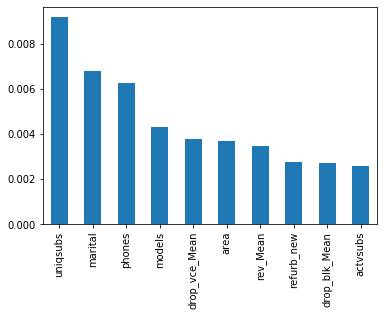

In [14]:
# To get the weights of all the variables
weights = pd.Series(model.coef_[0], index=X.columns.values)
print (weights.sort_values(ascending = False)[:10].plot(kind='bar'))

AxesSubplot(0.125,0.125;0.775x0.755)


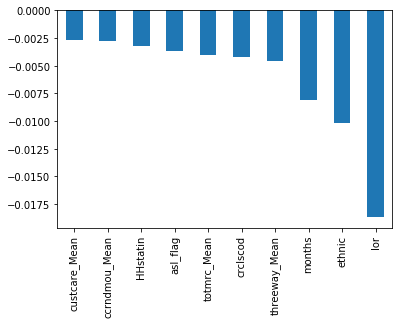

In [15]:
print (weights.sort_values(ascending = False)[-10:].plot(kind='bar'))

In [16]:
#Random Forest
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =10, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=30,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=-1, oob_score=True, random_state=10, verbose=0,
                       warm_start=False)

In [17]:
# Make predictions
prediction_test = model_rf.predict(X_test)
RF_Accuracy = metrics.accuracy_score(y_test, prediction_test)
print (RF_Accuracy)

0.6051


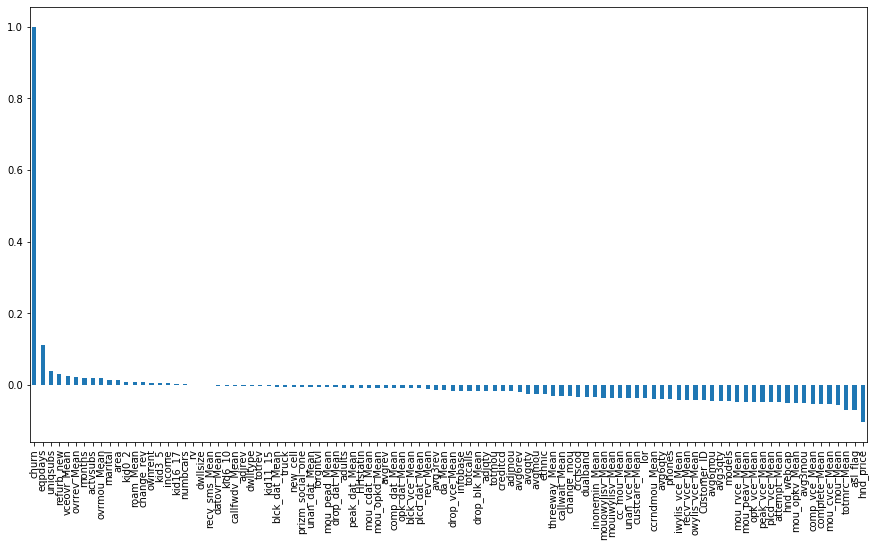

In [18]:
#Data Exploration on manipulated csv data

#Correlation of attributes with respect to attribute "Churn"
#Positive/upwards values shows "churn" is directly  e.g. epqdays(Number of days (age) of current equipment)
#Negative/downwards values shows attributes are inversly co-related with "Churn" e.g. hnd_price(Current handset price)
plt.figure(figsize=(15,8))
data.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

In [19]:
#Checking co-relation percentage  with output variable

cor = data.corr()
cor_target = abs(cor["churn"]) # reutrns attributes cor

#Selecting highly correlated features with prediction output & droping non corelated data
relevant_features = cor_target[cor_target>0.05]
relevant_features_length = len(relevant_features)
print(relevant_features)
print(relevant_features_length)

mou_Mean         0.056925
totmrc_Mean      0.068434
comp_vce_Mean    0.051574
mou_cvce_Mean    0.052042
complete_Mean    0.051740
churn            1.000000
asl_flag         0.069473
hnd_price        0.102748
eqpdays          0.112691
Name: churn, dtype: float64
9


In [20]:
data['churn'] = abs(data['churn'])

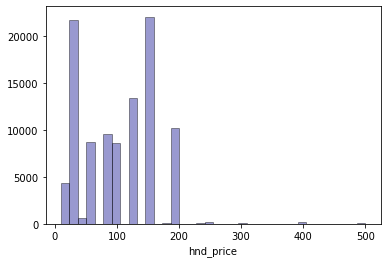

In [21]:
#Explore high co-related attributes hnd_proce (Current handset price)
sns.distplot(data['hnd_price'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

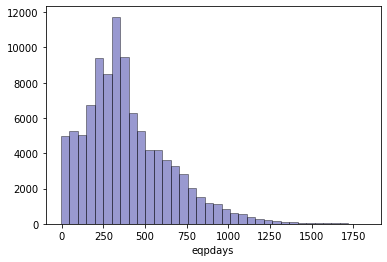

In [22]:
#eqpdays -> Number of days (age) of current equipment 

sns.distplot(data['eqpdays'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.show()

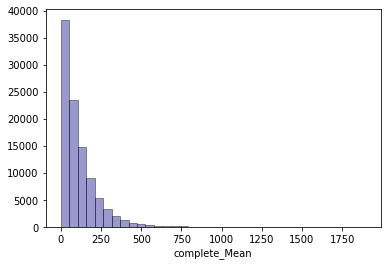

In [23]:
#Explore high co-related attributes complete_Mean (Mean number of completed calls)
sns.distplot(data['complete_Mean'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

plt.show()

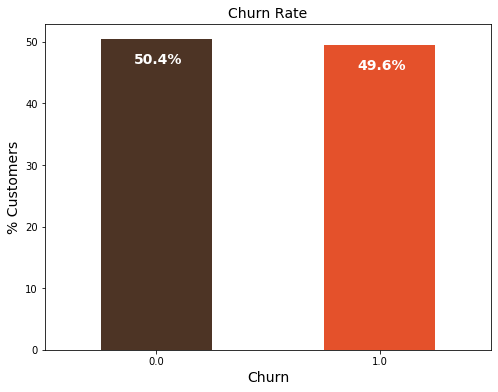

In [24]:
#Churn records in datset with value "1" or "0"
colors = ['#4D3425','#E4512B']
ax = (data['churn'].value_counts()*100.0 /len(data)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

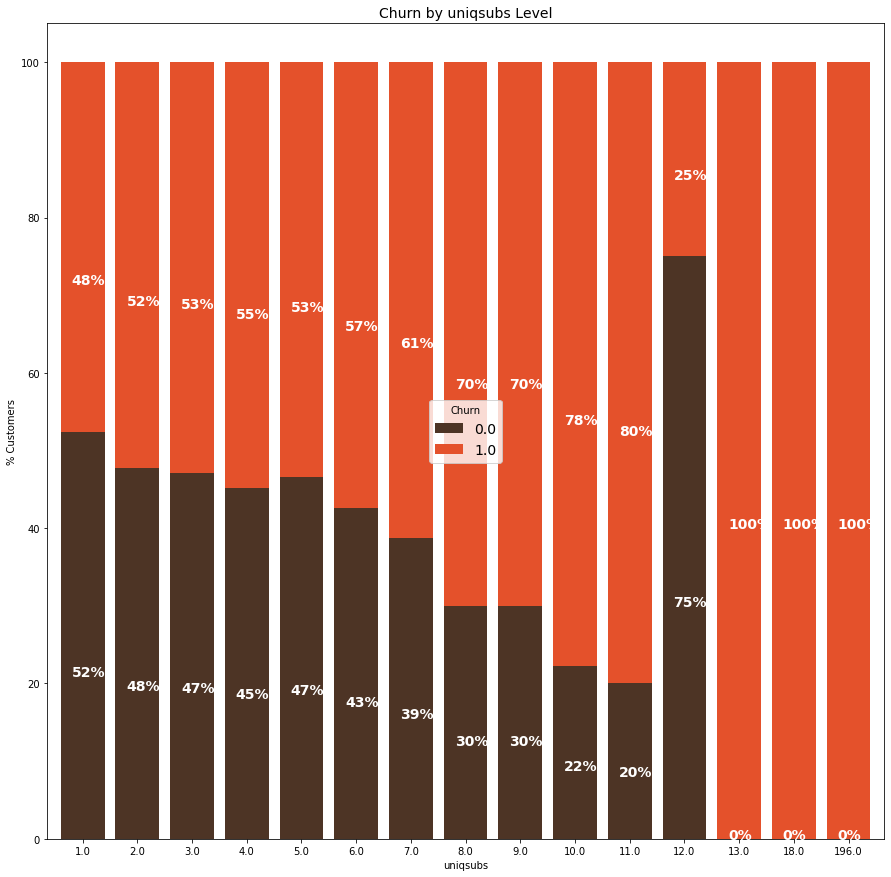

In [25]:
#Analysing churn co-relation with uniqsubs

colors = ['#4D3425','#E4512B']
uniqsubs_churn = data.groupby(['uniqsubs','churn']).size().unstack()

ax = (uniqsubs_churn.T*100.0 / uniqsubs_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.8,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (15,15),
                                                                color = colors)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by uniqsubs Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

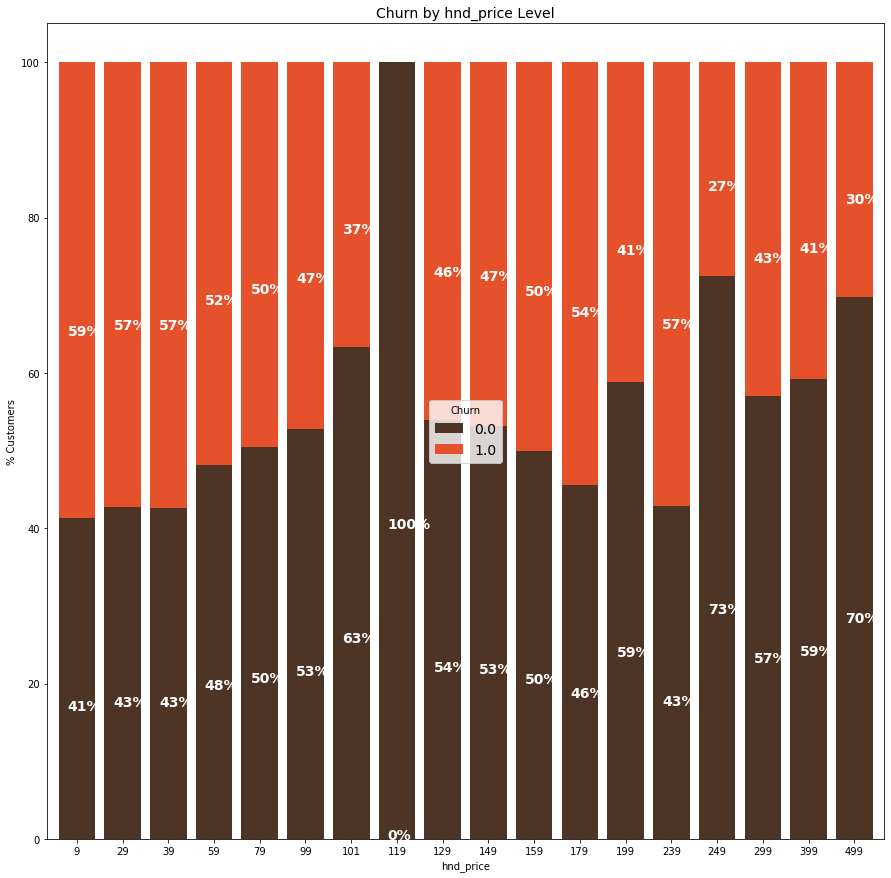

In [26]:
colors = ['#4D3425','#E4512B']
#hnd_price_int = in

data['hnd_price'] = data['hnd_price'].astype('int')

hnd_price_churn = data.groupby(['hnd_price','churn']).size().unstack()

ax = (hnd_price_churn.T*100.0 / hnd_price_churn.T.sum()).T.plot(kind='bar',
                                                                width = 0.8,
                                                                stacked = True,
                                                                rot = 0, 
                                                                figsize = (15,15),
                                                                color = colors)
#ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.legend(loc='center',prop={'size':14},title = 'Churn')
ax.set_ylabel('% Customers')
ax.set_title('Churn by hnd_price Level',size = 14)

# Code to add the data labels on the stacked bar chart
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:.0f}%'.format(height), (p.get_x()+.25*width, p.get_y()+.4*height),
                color = 'white',
               weight = 'bold',size =14)

In [27]:
#Selecting high co-related attributes with 'churn'
cor_data = data[['mou_Mean','totmrc_Mean','comp_vce_Mean','mou_cvce_Mean','complete_Mean','asl_flag','hnd_price','eqpdays']].to_numpy()

In [28]:
#Create Train and Test datset 
Y = data['churn'].values #churn values to be predicted  
X = cor_data # dataset with higest co-related attributes
#X = data.drop(columns= ['churn'])
#X = X.drop(columns= ['Customer_ID'])
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
np.shape(X_train)

(80000, 8)

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 8)                 0         
_________________________________________________________________
dense_1 (Dense)              (None, 15)                135       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 416
Trainable params: 416
Non-trainable params: 0
_________________________________________________________________
None


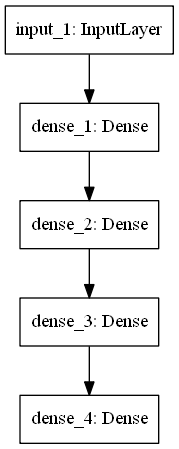

In [29]:
# Using Keras funcitonal API with 3 hidden layer
visible = Input(shape=(8,))
hidden1 = Dense(15, activation='relu')(visible) #hidden layer with 15 neurons with activation function as 'relu'
hidden2 = Dense(10, activation='relu')(hidden1)#hidden layer with 15 neurons with activation function as 'relu'
hidden3 = Dense(10, activation='relu')(hidden2)#hidden layer with 15 neurons with activation function as 'relu'
output = Dense(1, activation='sigmoid')(hidden3)#output layer with 1 neuron with activiation function as 'sigmoid'
model = Model(inputs=visible, outputs=output)
# summarize layers
print(model.summary())
# plot graph
plot_model(model, to_file='multilayer_perceptron_graph.png')

In [30]:
#defining optimizer , loss & metrics
model.compile(optimizer='rmsprop',
            loss='binary_crossentropy',
              metrics=['accuracy'])
model.fit(X_train, Y_train,
          epochs=1000,batch_size=1000)

Epoch 1/1000
80000/80000 [==============================] - ETA: 5:47 - loss: 97.1734 - accuracy: 0.485 - ETA: 1:54 - loss: 85.7120 - accuracy: 0.488 - ETA: 55s - loss: 73.6397 - accuracy: 0.484 - ETA: 31s - loss: 63.4385 - accuracy: 0.48 - ETA: 29s - loss: 61.4243 - accuracy: 0.48 - ETA: 26s - loss: 59.3192 - accuracy: 0.48 - ETA: 19s - loss: 52.1756 - accuracy: 0.48 - ETA: 13s - loss: 45.0960 - accuracy: 0.49 - ETA: 10s - loss: 39.1929 - accuracy: 0.49 - ETA: 9s - loss: 38.1454 - accuracy: 0.4926 - ETA: 7s - loss: 33.5063 - accuracy: 0.491 - ETA: 5s - loss: 29.0133 - accuracy: 0.491 - ETA: 4s - loss: 27.1503 - accuracy: 0.491 - ETA: 4s - loss: 25.0375 - accuracy: 0.491 - ETA: 3s - loss: 23.6690 - accuracy: 0.491 - ETA: 3s - loss: 22.8478 - accuracy: 0.490 - ETA: 2s - loss: 21.0459 - accuracy: 0.488 - ETA: 1s - loss: 19.7810 - accuracy: 0.488 - ETA: 1s - loss: 18.6655 - accuracy: 0.487 - ETA: 0s - loss: 17.4417 - accuracy: 0.487 - ETA: 0s - loss: 16.3678 - accuracy: 0.488 - ETA: 0s - 

80000/80000 [==============================] - ETA: 1s - loss: 0.6830 - accuracy: 0.55 - ETA: 1s - loss: 0.6882 - accuracy: 0.55 - ETA: 1s - loss: 0.6883 - accuracy: 0.55 - ETA: 1s - loss: 0.7005 - accuracy: 0.54 - ETA: 1s - loss: 0.7160 - accuracy: 0.54 - ETA: 1s - loss: 0.7134 - accuracy: 0.54 - ETA: 1s - loss: 0.7110 - accuracy: 0.54 - ETA: 1s - loss: 0.7092 - accuracy: 0.54 - ETA: 2s - loss: 0.7077 - accuracy: 0.54 - ETA: 2s - loss: 0.7065 - accuracy: 0.54 - ETA: 2s - loss: 0.7056 - accuracy: 0.54 - ETA: 2s - loss: 0.7053 - accuracy: 0.54 - ETA: 2s - loss: 0.7046 - accuracy: 0.54 - ETA: 2s - loss: 0.7047 - accuracy: 0.54 - ETA: 2s - loss: 0.7046 - accuracy: 0.54 - ETA: 2s - loss: 0.7050 - accuracy: 0.54 - ETA: 2s - loss: 0.7049 - accuracy: 0.54 - ETA: 3s - loss: 0.7047 - accuracy: 0.54 - ETA: 3s - loss: 0.7055 - accuracy: 0.54 - ETA: 2s - loss: 0.7097 - accuracy: 0.54 - ETA: 1s - loss: 0.7081 - accuracy: 0.54 - ETA: 1s - loss: 0.7076 - accuracy: 0.54 - ETA: 1s - loss: 0.7071 - accu

Epoch 17/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6865 - accuracy: 0.57 - ETA: 0s - loss: 0.6998 - accuracy: 0.54 - ETA: 0s - loss: 0.7019 - accuracy: 0.53 - ETA: 0s - loss: 0.6969 - accuracy: 0.54 - ETA: 0s - loss: 0.6971 - accuracy: 0.54 - ETA: 0s - loss: 0.6984 - accuracy: 0.54 - ETA: 0s - loss: 0.6997 - accuracy: 0.54 - ETA: 0s - loss: 0.6988 - accuracy: 0.54 - ETA: 0s - loss: 0.6993 - accuracy: 0.54 - ETA: 0s - loss: 0.6995 - accuracy: 0.54 - ETA: 0s - loss: 0.6990 - accuracy: 0.54 - ETA: 0s - loss: 0.6983 - accuracy: 0.54 - ETA: 0s - loss: 0.6977 - accuracy: 0.54 - ETA: 0s - loss: 0.6978 - accuracy: 0.54 - ETA: 0s - loss: 0.6976 - accuracy: 0.54 - ETA: 0s - loss: 0.6978 - accuracy: 0.54 - 1s 11us/step - loss: 0.6977 - accuracy: 0.5446
Epoch 18/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6820 - accuracy: 0.57 - ETA: 0s - loss: 0.7073 - accuracy: 0.53 - ETA: 0s - loss: 0.6993 - accuracy: 0.54 - ETA: 0s - loss: 0.6968 - accuracy

80000/80000 [==============================] - ETA: 1s - loss: 0.7013 - accuracy: 0.53 - ETA: 0s - loss: 0.6873 - accuracy: 0.56 - ETA: 0s - loss: 0.6871 - accuracy: 0.55 - ETA: 0s - loss: 0.6876 - accuracy: 0.55 - ETA: 0s - loss: 0.6871 - accuracy: 0.55 - ETA: 0s - loss: 0.6874 - accuracy: 0.55 - ETA: 0s - loss: 0.6865 - accuracy: 0.55 - ETA: 0s - loss: 0.6857 - accuracy: 0.55 - ETA: 0s - loss: 0.6863 - accuracy: 0.55 - ETA: 0s - loss: 0.6865 - accuracy: 0.55 - ETA: 0s - loss: 0.6868 - accuracy: 0.55 - ETA: 0s - loss: 0.6868 - accuracy: 0.55 - ETA: 0s - loss: 0.6876 - accuracy: 0.55 - 1s 9us/step - loss: 0.6876 - accuracy: 0.5553
Epoch 27/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6845 - accuracy: 0.55 - ETA: 1s - loss: 0.6830 - accuracy: 0.55 - ETA: 0s - loss: 0.6860 - accuracy: 0.55 - ETA: 0s - loss: 0.6866 - accuracy: 0.55 - ETA: 0s - loss: 0.6867 - accuracy: 0.55 - ETA: 0s - loss: 0.6856 - accuracy: 0.55 - ETA: 0s - loss: 0.6860 - accuracy: 0.55 - ETA: 0

80000/80000 [==============================] - ETA: 1s - loss: 0.6822 - accuracy: 0.54 - ETA: 0s - loss: 0.6814 - accuracy: 0.56 - ETA: 0s - loss: 0.6808 - accuracy: 0.57 - ETA: 0s - loss: 0.6804 - accuracy: 0.56 - ETA: 0s - loss: 0.6806 - accuracy: 0.56 - ETA: 0s - loss: 0.6809 - accuracy: 0.56 - ETA: 0s - loss: 0.6815 - accuracy: 0.56 - ETA: 0s - loss: 0.6814 - accuracy: 0.56 - ETA: 0s - loss: 0.6818 - accuracy: 0.56 - ETA: 0s - loss: 0.6818 - accuracy: 0.56 - ETA: 0s - loss: 0.6820 - accuracy: 0.56 - ETA: 0s - loss: 0.6823 - accuracy: 0.56 - ETA: 0s - loss: 0.6826 - accuracy: 0.56 - ETA: 0s - loss: 0.6827 - accuracy: 0.56 - ETA: 0s - loss: 0.6827 - accuracy: 0.56 - ETA: 0s - loss: 0.6827 - accuracy: 0.56 - ETA: 0s - loss: 0.6827 - accuracy: 0.56 - ETA: 0s - loss: 0.6825 - accuracy: 0.56 - ETA: 0s - loss: 0.6825 - accuracy: 0.56 - ETA: 0s - loss: 0.6824 - accuracy: 0.56 - ETA: 0s - loss: 0.6826 - accuracy: 0.56 - 1s 16us/step - loss: 0.6824 - accuracy: 0.5635
Epoch 38/1000
80000/8000

80000/80000 [==============================] - ETA: 0s - loss: 0.6840 - accuracy: 0.56 - ETA: 0s - loss: 0.6787 - accuracy: 0.57 - ETA: 0s - loss: 0.6791 - accuracy: 0.56 - ETA: 0s - loss: 0.6800 - accuracy: 0.56 - ETA: 0s - loss: 0.6800 - accuracy: 0.56 - ETA: 0s - loss: 0.6798 - accuracy: 0.57 - ETA: 0s - loss: 0.6796 - accuracy: 0.57 - ETA: 0s - loss: 0.6798 - accuracy: 0.56 - ETA: 0s - loss: 0.6795 - accuracy: 0.56 - ETA: 0s - loss: 0.6792 - accuracy: 0.56 - ETA: 0s - loss: 0.6796 - accuracy: 0.56 - ETA: 0s - loss: 0.6797 - accuracy: 0.56 - ETA: 0s - loss: 0.6799 - accuracy: 0.56 - ETA: 0s - loss: 0.6800 - accuracy: 0.56 - 1s 10us/step - loss: 0.6802 - accuracy: 0.5657
Epoch 47/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6793 - accuracy: 0.54 - ETA: 0s - loss: 0.6799 - accuracy: 0.56 - ETA: 0s - loss: 0.6803 - accuracy: 0.56 - ETA: 0s - loss: 0.6794 - accuracy: 0.56 - ETA: 0s - loss: 0.6798 - accuracy: 0.56 - ETA: 0s - loss: 0.6791 - accuracy: 0.56 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6820 - accuracy: 0.56 - ETA: 0s - loss: 0.6792 - accuracy: 0.56 - ETA: 0s - loss: 0.6775 - accuracy: 0.56 - ETA: 0s - loss: 0.6780 - accuracy: 0.56 - ETA: 0s - loss: 0.6786 - accuracy: 0.56 - ETA: 0s - loss: 0.6792 - accuracy: 0.56 - ETA: 0s - loss: 0.6786 - accuracy: 0.56 - ETA: 0s - loss: 0.6791 - accuracy: 0.56 - ETA: 0s - loss: 0.6789 - accuracy: 0.56 - ETA: 0s - loss: 0.6790 - accuracy: 0.56 - ETA: 0s - loss: 0.6790 - accuracy: 0.56 - 1s 7us/step - loss: 0.6791 - accuracy: 0.5667
Epoch 56/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6848 - accuracy: 0.56 - ETA: 0s - loss: 0.6784 - accuracy: 0.57 - ETA: 0s - loss: 0.6793 - accuracy: 0.57 - ETA: 0s - loss: 0.6796 - accuracy: 0.56 - ETA: 0s - loss: 0.6796 - accuracy: 0.56 - ETA: 0s - loss: 0.6797 - accuracy: 0.56 - ETA: 0s - loss: 0.6793 - accuracy: 0.56 - ETA: 0s - loss: 0.6791 - accuracy: 0.56 - ETA: 0s - loss: 0.6791 - accuracy: 0.56 - ETA: 0

80000/80000 [==============================] - ETA: 0s - loss: 0.6719 - accuracy: 0.56 - ETA: 0s - loss: 0.6784 - accuracy: 0.56 - ETA: 0s - loss: 0.6790 - accuracy: 0.56 - ETA: 0s - loss: 0.6784 - accuracy: 0.56 - ETA: 0s - loss: 0.6786 - accuracy: 0.56 - ETA: 0s - loss: 0.6784 - accuracy: 0.56 - ETA: 0s - loss: 0.6784 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6782 - accuracy: 0.56 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6785 - accuracy: 0.56 - 1s 9us/step - loss: 0.6785 - accuracy: 0.5683
Epoch 69/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6808 - accuracy: 0.54 - ETA: 0s - loss: 0.6787 - accuracy: 0.56 - ETA: 0s - loss: 0.6780 - accuracy: 0.56 - ETA: 0s - loss: 0.6787 - accuracy: 0.56 - ETA: 0s - loss: 0.6786 - accuracy: 0.56 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6780 - accuracy: 0.56 - ETA: 0

80000/80000 [==============================] - ETA: 1s - loss: 0.6846 - accuracy: 0.56 - ETA: 1s - loss: 0.6759 - accuracy: 0.57 - ETA: 1s - loss: 0.6755 - accuracy: 0.57 - ETA: 1s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6771 - accuracy: 0.57 - ETA: 0s - loss: 0.6780 - accuracy: 0.57 - ETA: 0s - loss: 0.6777 - accuracy: 0.57 - ETA: 0s - loss: 0.6778 - accuracy: 0.57 - ETA: 0s - loss: 0.6779 - accuracy: 0.57 - ETA: 0s - loss: 0.6777 - accuracy: 0.57 - ETA: 0s - loss: 0.6782 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6779 - accuracy: 0.56 - ETA: 0s - loss: 0.6780 - accuracy: 0.56 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6780 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6779 - accuracy: 0.56 - 1s 18us/step - loss: 0.6780 - accuracy: 0.5686
Epoch 78/1000
80000/8000

80000/80000 [==============================] - ETA: 1s - loss: 0.6862 - accuracy: 0.56 - ETA: 1s - loss: 0.6787 - accuracy: 0.57 - ETA: 1s - loss: 0.6793 - accuracy: 0.56 - ETA: 1s - loss: 0.6782 - accuracy: 0.57 - ETA: 1s - loss: 0.6788 - accuracy: 0.57 - ETA: 1s - loss: 0.6782 - accuracy: 0.57 - ETA: 1s - loss: 0.6783 - accuracy: 0.56 - ETA: 1s - loss: 0.6783 - accuracy: 0.56 - ETA: 0s - loss: 0.6783 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6776 - accuracy: 0.56 - ETA: 0s - loss: 0.6776 - accuracy: 0.56 - ETA: 0s - loss: 0.6775 - accuracy: 0.57 - ETA: 0s - loss: 0.6776 - accuracy: 0.57 - ETA: 0s - loss: 0.6777 - accuracy: 0.57 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6777 - accuracy: 0.57 - ETA: 0s - loss: 0.6775 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - ETA: 0s - loss: 0.6775 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - 1s 16us/step - loss: 0.6773 -

80000/80000 [==============================] - ETA: 1s - loss: 0.6747 - accuracy: 0.59 - ETA: 1s - loss: 0.6791 - accuracy: 0.57 - ETA: 1s - loss: 0.6779 - accuracy: 0.57 - ETA: 1s - loss: 0.6789 - accuracy: 0.57 - ETA: 1s - loss: 0.6785 - accuracy: 0.57 - ETA: 2s - loss: 0.6790 - accuracy: 0.57 - ETA: 2s - loss: 0.6786 - accuracy: 0.57 - ETA: 2s - loss: 0.6783 - accuracy: 0.57 - ETA: 2s - loss: 0.6780 - accuracy: 0.57 - ETA: 2s - loss: 0.6776 - accuracy: 0.57 - ETA: 2s - loss: 0.6779 - accuracy: 0.57 - ETA: 1s - loss: 0.6769 - accuracy: 0.57 - ETA: 1s - loss: 0.6773 - accuracy: 0.57 - ETA: 1s - loss: 0.6771 - accuracy: 0.57 - ETA: 1s - loss: 0.6773 - accuracy: 0.57 - ETA: 1s - loss: 0.6777 - accuracy: 0.57 - ETA: 1s - loss: 0.6771 - accuracy: 0.57 - ETA: 0s - loss: 0.6770 - accuracy: 0.57 - ETA: 0s - loss: 0.6770 - accuracy: 0.57 - ETA: 0s - loss: 0.6772 - accuracy: 0.57 - ETA: 0s - loss: 0.6770 - accuracy: 0.57 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6773 - accu

Epoch 101/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6763 - accuracy: 0.55 - ETA: 0s - loss: 0.6791 - accuracy: 0.56 - ETA: 0s - loss: 0.6785 - accuracy: 0.56 - ETA: 0s - loss: 0.6789 - accuracy: 0.56 - ETA: 0s - loss: 0.6774 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.57 - ETA: 0s - loss: 0.6783 - accuracy: 0.57 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6776 - accuracy: 0.57 - ETA: 0s - loss: 0.6775 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - ETA: 0s - loss: 0.6771 - accuracy: 0.57 - ETA: 0s - loss: 0.6769 - accuracy: 0.57 - ETA: 0s - loss: 0.6771 - accuracy: 0.57 - 1s 9us/step - loss: 0.6773 - accuracy: 0.5701
Epoch 102/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6822 - accuracy: 0.56 - ETA: 0s - loss: 0.6789 - accuracy: 0.56 - ETA: 0s - loss: 0.6776 - accuracy: 0.56 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6772 - accurac

80000/80000 [==============================] - ETA: 1s - loss: 0.6685 - accuracy: 0.57 - ETA: 0s - loss: 0.6790 - accuracy: 0.56 - ETA: 0s - loss: 0.6776 - accuracy: 0.57 - ETA: 0s - loss: 0.6775 - accuracy: 0.57 - ETA: 0s - loss: 0.6775 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.56 - ETA: 0s - loss: 0.6772 - accuracy: 0.56 - ETA: 0s - loss: 0.6775 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - ETA: 0s - loss: 0.6770 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6770 - accuracy: 0.57 - 1s 8us/step - loss: 0.6769 - accuracy: 0.5712
Epoch 114/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6652 - accuracy: 0.58 - ETA: 0s - loss: 0.6801 - accuracy: 0.55 - ETA: 0s - loss: 0.6776 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.57 - ETA: 0s - loss: 0.6772 - accuracy: 0.57 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6779 - accuracy: 0.56 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6776 - accuracy: 0.57 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6780 - accuracy: 0.56 - ETA: 0s - loss: 0.6775 - accuracy: 0.56 - ETA: 0s - loss: 0.6769 - accuracy: 0.56 - ETA: 0s - loss: 0.6768 - accuracy: 0.56 - ETA: 0s - loss: 0.6771 - accuracy: 0.56 - ETA: 0s - loss: 0.6769 - accuracy: 0.56 - ETA: 0s - loss: 0.6769 - accuracy: 0.56 - ETA: 0s - loss: 0.6769 - accuracy: 0.57 - 1s 7us/step - loss: 0.6771 - accuracy: 0.5698
Epoch 125/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6803 - accuracy: 0.55 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6769 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 2s - loss: 0.6777 - accuracy: 0.57 - ETA: 5s - loss: 0.6816 - accuracy: 0.55 - ETA: 2s - loss: 0.6808 - accuracy: 0.55 - ETA: 2s - loss: 0.6798 - accuracy: 0.56 - ETA: 2s - loss: 0.6803 - accuracy: 0.55 - ETA: 3s - loss: 0.6799 - accuracy: 0.55 - ETA: 4s - loss: 0.6798 - accuracy: 0.55 - ETA: 4s - loss: 0.6800 - accuracy: 0.55 - ETA: 3s - loss: 0.6797 - accuracy: 0.56 - ETA: 3s - loss: 0.6796 - accuracy: 0.56 - ETA: 3s - loss: 0.6785 - accuracy: 0.56 - ETA: 2s - loss: 0.6781 - accuracy: 0.56 - ETA: 2s - loss: 0.6786 - accuracy: 0.56 - ETA: 2s - loss: 0.6774 - accuracy: 0.56 - ETA: 2s - loss: 0.6773 - accuracy: 0.56 - ETA: 1s - loss: 0.6773 - accuracy: 0.56 - ETA: 1s - loss: 0.6773 - accuracy: 0.56 - ETA: 1s - loss: 0.6768 - accuracy: 0.56 - ETA: 1s - loss: 0.6769 - accuracy: 0.56 - ETA: 1s - loss: 0.6771 - accuracy: 0.56 - ETA: 1s - loss: 0.6772 - accuracy: 0.56 - ETA: 0s - loss: 0.6771 - accuracy: 0.56 - ETA: 0s - loss: 0.6770 - accu

80000/80000 [==============================] - ETA: 0s - loss: 0.6835 - accuracy: 0.55 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - 1s 8us/step - loss: 0.6765 - accuracy: 0.5711
Epoch 144/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6782 - accuracy: 0.55 - ETA: 1s - loss: 0.6773 - accuracy: 0.56 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6801 - accuracy: 0.57 - ETA: 0s - loss: 0.6783 - accuracy: 0.57 - ETA: 0s - loss: 0.6770 - accuracy: 0.57 - ETA: 0s - loss: 0.6773 - accuracy: 0.57 - ETA: 0s - loss: 0.6769 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - 1s 9us/step - loss: 0.6766 - accuracy: 0.5714
Epoch 155/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6821 - accuracy: 0.55 - ETA: 0s - loss: 0.6796 - accuracy: 0.55 - ETA: 0s - loss: 0.6790 - accuracy: 0.56 - ETA: 0s - loss: 0.6785 - accuracy: 0.56 - ETA: 0s - loss: 0.6774 - accuracy: 0.56 - ETA: 0s - loss: 0.6766 - accuracy: 0.56 - ETA: 

Epoch 167/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6701 - accuracy: 0.59 - ETA: 1s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6788 - accuracy: 0.56 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6769 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - 1s 12us/step - loss: 0.6764 - accuracy: 0.5720
Epoch 168/1000
80000/80000 [==============================] - ETA: 3s - loss: 0.6747 - accuracy: 0.59 - ETA: 5s - loss: 0.6766 - accuracy: 0.58 - ETA: 4s - loss: 0.6756 - accuracy: 0.58 - ETA: 3s - loss: 0.6747 - accura

Epoch 177/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6782 - accuracy: 0.57 - ETA: 0s - loss: 0.6770 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6770 - accuracy: 0.56 - ETA: 0s - loss: 0.6777 - accuracy: 0.56 - ETA: 0s - loss: 0.6783 - accuracy: 0.56 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6774 - accuracy: 0.56 - ETA: 0s - loss: 0.6771 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - 1s 8us/step - loss: 0.6764 - accuracy: 0.5717
Epoch 178/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6792 - accuracy: 0.56 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accurac

80000/80000 [==============================] - ETA: 2s - loss: 0.6835 - accuracy: 0.54 - ETA: 1s - loss: 0.6786 - accuracy: 0.56 - ETA: 1s - loss: 0.6773 - accuracy: 0.56 - ETA: 1s - loss: 0.6781 - accuracy: 0.56 - ETA: 1s - loss: 0.6779 - accuracy: 0.56 - ETA: 1s - loss: 0.6779 - accuracy: 0.56 - ETA: 1s - loss: 0.6761 - accuracy: 0.57 - ETA: 1s - loss: 0.6764 - accuracy: 0.56 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - 1s 15us/step - loss: 0.6760 -

80000/80000 [==============================] - ETA: 0s - loss: 0.6770 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - 1s 9us/step - loss: 0.6759 - accuracy: 0.5718
Epoch 197/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6867 - accuracy: 0.53 - ETA: 1s - loss: 0.6761 - accuracy: 0.56 - ETA: 1s - loss: 0.6738 - accuracy: 0.57 - ETA: 1s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 1s - loss: 0.6744 - accuracy: 0.57 - ETA: 1s - loss: 0.6746 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 3s - loss: 0.6726 - accuracy: 0.58 - ETA: 3s - loss: 0.6742 - accuracy: 0.58 - ETA: 3s - loss: 0.6772 - accuracy: 0.57 - ETA: 3s - loss: 0.6776 - accuracy: 0.57 - ETA: 4s - loss: 0.6767 - accuracy: 0.57 - ETA: 4s - loss: 0.6772 - accuracy: 0.57 - ETA: 4s - loss: 0.6752 - accuracy: 0.57 - ETA: 3s - loss: 0.6753 - accuracy: 0.57 - ETA: 2s - loss: 0.6768 - accuracy: 0.57 - ETA: 2s - loss: 0.6764 - accuracy: 0.57 - ETA: 2s - loss: 0.6767 - accuracy: 0.57 - ETA: 1s - loss: 0.6766 - accuracy: 0.57 - ETA: 1s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - 1s 17us/step - loss: 0.6758 - accuracy: 0.5731
Epoch 207/1000
80000/800

80000/80000 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.58 - ETA: 0s - loss: 0.6760 - accuracy: 0.56 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.56 - ETA: 0s - loss: 0.6763 - accuracy: 0.56 - ETA: 0s - loss: 0.6756 - accuracy: 0.56 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - 1s 7us/step - loss: 0.6757 - accuracy: 0.5716
Epoch 218/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6779 - accuracy: 0.58 - ETA: 0s - loss: 0.6731 - accuracy: 0.58 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 2s - loss: 0.6735 - accuracy: 0.57 - ETA: 1s - loss: 0.6763 - accuracy: 0.56 - ETA: 0s - loss: 0.6769 - accuracy: 0.56 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6773 - accuracy: 0.56 - ETA: 0s - loss: 0.6768 - accuracy: 0.56 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - 1s 10us/step - loss: 0.6758 - accuracy: 0.5744
Epoch 228/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6700 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.56 - ETA: 0s - loss: 0.6773 - accuracy: 0.56 - ETA: 0s - loss: 0.6767 - accuracy: 0.56 - ETA:

80000/80000 [==============================] - ETA: 1s - loss: 0.6764 - accuracy: 0.56 - ETA: 1s - loss: 0.6794 - accuracy: 0.56 - ETA: 0s - loss: 0.6776 - accuracy: 0.57 - ETA: 0s - loss: 0.6764 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - 1s 12us/step - loss: 0.6757 - accuracy: 0.5727
Epoch 240/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6699 - accuracy: 0.59 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 0s - loss: 0.6738 - accuracy: 0.56 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - 1s 8us/step - loss: 0.6755 - accuracy: 0.5737
Epoch 252/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6665 - accuracy: 0.60 - ETA: 0s - loss: 0.6773 - accuracy: 0.56 - ETA: 0s - loss: 0.6774 - accuracy: 0.56 - ETA: 0s - loss: 0.6780 - accuracy: 0.56 - ETA: 0s - loss: 0.6771 - accuracy: 0.56 - ETA: 0s - loss: 0.6769 - accuracy: 0.56 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6762 - accuracy: 0.56 - ETA: 2s - loss: 0.6744 - accuracy: 0.57 - ETA: 1s - loss: 0.6720 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - 1s 12us/step - loss: 0.6755 - accuracy: 0.5731
Epoch 265/1000
80000/80000 [==============================] - ETA: 2s - loss: 0.6820 - accuracy: 0.54 - ETA: 1s - loss: 0.6769 - accuracy: 0.57 - ETA: 1s - loss: 0.6760 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - 1s 8us/step - loss: 0.6754 - accuracy: 0.5737
Epoch 278/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - ETA: 0s - loss: 0.6768 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6755 - accuracy: 0.57 - ETA: 1s - loss: 0.6754 - accuracy: 0.57 - ETA: 1s - loss: 0.6748 - accuracy: 0.57 - ETA: 2s - loss: 0.6728 - accuracy: 0.58 - ETA: 1s - loss: 0.6728 - accuracy: 0.57 - ETA: 1s - loss: 0.6731 - accuracy: 0.57 - ETA: 1s - loss: 0.6736 - accuracy: 0.57 - ETA: 1s - loss: 0.6746 - accuracy: 0.57 - ETA: 1s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accu

80000/80000 [==============================] - ETA: 0s - loss: 0.6701 - accuracy: 0.59 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - 1s 7us/step - loss: 0.6749 - accuracy: 0.5745
Epoch 301/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6777 - accuracy: 0.58 - ETA: 0s - loss: 0.6781 - accuracy: 0.56 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6790 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - 1s 8us/step - loss: 0.6749 - accuracy: 0.5751
Epoch 312/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6802 - accuracy: 0.57 - ETA: 0s - loss: 0.6783 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6809 - accuracy: 0.55 - ETA: 0s - loss: 0.6776 - accuracy: 0.56 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - 1s 8us/step - loss: 0.6747 - accuracy: 0.5742
Epoch 326/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6848 - accuracy: 0.54 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6850 - accuracy: 0.56 - ETA: 0s - loss: 0.6775 - accuracy: 0.56 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - 1s 10us/step - loss: 0.6749 - accuracy: 0.5747
Epoch 337/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6706 - accuracy: 0.60 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 0s - loss: 0.6907 - accuracy: 0.54 - ETA: 0s - loss: 0.6758 - accuracy: 0.56 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - 0s 6us/step - loss: 0.6747 - accuracy: 0.5752
Epoch 351/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6772 - accuracy: 0.58 - ETA: 0s - loss: 0.6736 - accuracy: 0.58 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - 1s 7u

80000/80000 [==============================] - ETA: 0s - loss: 0.6715 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.56 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - 1s 7us/step - loss: 0.6746 - accuracy: 0.5750
Epoch 364/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6792 - accuracy: 0.56 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6758 - accuracy: 0.55 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - 1s 8us/step - loss: 0.6749 - accuracy: 0.5748
Epoch 376/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6795 - accuracy: 0.56 - ETA: 0s - loss: 0.6766 - accuracy: 0.56 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - 1s 7us/step - loss: 0.6747 - accuracy: 0.5746
Epoch 388/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6747 - accuracy: 0.56 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6694 - accuracy: 0.58 - ETA: 0s - loss: 0.6745 - accuracy: 0.56 - ETA: 0s - loss: 0.6760 - accuracy: 0.56 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - 1s 6us/step - loss: 0.6746 - accuracy: 0.5750
Epoch 402/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6765 - accuracy: 0.57 - ETA: 1s - loss: 0.6748 - accuracy: 0.58 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6762 - accuracy: 0.56 - ETA: 0s - loss: 0.6718 - accuracy: 0.58 - ETA: 0s - loss: 0.6713 - accuracy: 0.58 - ETA: 0s - loss: 0.6714 - accuracy: 0.58 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - 1s 11us/step - loss: 0.6744 - accuracy: 0.5755
Epoch 414/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6786 - accuracy: 0.56 - ETA: 1s - loss: 0.6790 - accuracy: 0.56 - ETA: 1s - loss: 0.6767 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 1s - loss: 0.6739 - accuracy: 0.56 - ETA: 1s - loss: 0.6695 - accuracy: 0.57 - ETA: 1s - loss: 0.6705 - accuracy: 0.57 - ETA: 1s - loss: 0.6718 - accuracy: 0.57 - ETA: 1s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 1s - loss: 0.6724 - accuracy: 0.57 - ETA: 1s - loss: 0.6728 - accuracy: 0.57 - ETA: 1s - loss: 0.6732 - accuracy: 0.57 - ETA: 1s - loss: 0.6732 - accuracy: 0.57 - ETA: 1s - loss: 0.6736 - accuracy: 0.57 - ETA: 2s - loss: 0.6739 - accuracy: 0.57 - ETA: 2s - loss: 0.6734 - accuracy: 0.57 - ETA: 2s - loss: 0.6734 - accuracy: 0.57 - ETA: 2s - loss: 0.6737 - accuracy: 0.57 - ETA: 2s - loss: 0.6739 - accuracy: 0.57 - ETA: 2s - loss: 0.6741 - accuracy: 0.57 - ETA: 2s - loss: 0.6740 - accuracy: 0.57 - ETA: 1s - loss: 0.6742 - accuracy: 0.57 - ETA: 1s - loss: 0.6743 - accuracy: 0.57 - ETA: 1s - loss: 0.6747 - accuracy: 0.57 - ETA: 1s - loss: 0.6747 - accuracy: 0.57 - ETA: 1s - loss: 0.6746 - accu

80000/80000 [==============================] - ETA: 1s - loss: 0.6756 - accuracy: 0.57 - ETA: 3s - loss: 0.6756 - accuracy: 0.57 - ETA: 2s - loss: 0.6761 - accuracy: 0.57 - ETA: 2s - loss: 0.6752 - accuracy: 0.57 - ETA: 2s - loss: 0.6744 - accuracy: 0.57 - ETA: 2s - loss: 0.6747 - accuracy: 0.57 - ETA: 1s - loss: 0.6734 - accuracy: 0.57 - ETA: 1s - loss: 0.6747 - accuracy: 0.57 - ETA: 1s - loss: 0.6743 - accuracy: 0.57 - ETA: 1s - loss: 0.6741 - accuracy: 0.57 - ETA: 1s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - 1s 13us/step - loss: 0.6744 - accuracy: 0.5757
Epoch 433/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6705 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 0s - loss: 0.6723 - accuracy: 0.58 - ETA: 0s - loss: 0.6737 - accuracy: 0.58 - ETA: 0s - loss: 0.6737 - accuracy: 0.58 - ETA: 0s - loss: 0.6743 - accuracy: 0.58 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - 0s 6us/step - loss: 0.6743 - accuracy: 0.5760
Epoch 447/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6759 - accuracy: 0.58 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - 0s 6us/step - loss: 0.6743 - accuracy: 0.5758
E

80000/80000 [==============================] - ETA: 0s - loss: 0.6738 - accuracy: 0.56 - ETA: 0s - loss: 0.6760 - accuracy: 0.56 - ETA: 0s - loss: 0.6763 - accuracy: 0.56 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - 0s 6us/step - loss: 0.6745 - accuracy: 0.5749
Epoch 461/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6797 - accuracy: 0.56 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6722 - accuracy: 0.58 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - 0s 6us/step - loss: 0.6740 - accuracy: 0.5755
E

Epoch 475/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6624 - accuracy: 0.58 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - 0s 6us/step - loss: 0.6744 - accuracy: 0.5756
Epoch 476/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.56 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accurac

80000/80000 [==============================] - ETA: 0s - loss: 0.6841 - accuracy: 0.54 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - 0s 5us/step - loss: 0.6743 - accuracy: 0.5754
Epoch 492/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6799 - accuracy: 0.54 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - 0s 5us/step - loss: 0.6743 - accuracy: 0.5760
Epoch 493/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6823 - accuracy: 0.53 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 

80000/80000 [==============================] - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.56 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - 0s 5us/step - loss: 0.6741 - accuracy: 0.5753
Epoch 510/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6767 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - 0s 5us/step - loss: 0.6743 - accuracy: 0.5761
Epoch 511/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6810 - accuracy: 0.55 - ETA: 0s - loss: 0.6735 

80000/80000 [==============================] - ETA: 1s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - 0s 5us/step - loss: 0.6744 - accuracy: 0.5759
Epoch 528/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6567 - accuracy: 0.60 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - 0s 6us/step - loss: 0.6747 - accuracy: 0.5752
Epoch 529/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6613 

80000/80000 [==============================] - ETA: 1s - loss: 0.6813 - accuracy: 0.56 - ETA: 0s - loss: 0.6773 - accuracy: 0.56 - ETA: 0s - loss: 0.6756 - accuracy: 0.56 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - 1s 7us/step - loss: 0.6741 - accuracy: 0.5759
Epoch 542/1000
80000/80000 [==============================] - ETA: 2s - loss: 0.6809 - accuracy: 0.55 - ETA: 1s - loss: 0.6747 - accuracy: 0.58 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - 1s 6us/step - loss: 0.6743 - accuracy: 0.5760
E

80000/80000 [==============================] - ETA: 0s - loss: 0.6797 - accuracy: 0.56 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6754 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - 0s 6us/step - loss: 0.6741 - accuracy: 0.5762
Epoch 559/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6772 - accuracy: 0.58 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - 0s 5us/step - loss: 0.6745 - accuracy: 0.5760
Epoch 560/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6749 

80000/80000 [==============================] - ETA: 0s - loss: 0.6684 - accuracy: 0.58 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - 0s 6us/step - loss: 0.6743 - accuracy: 0.5760
Epoch 575/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6622 - accuracy: 0.60 - ETA: 0s - loss: 0.6720 - accuracy: 0.58 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - 1s 7u

80000/80000 [==============================] - ETA: 0s - loss: 0.6701 - accuracy: 0.58 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - 0s 6us/step - loss: 0.6741 - accuracy: 0.5757
Epoch 592/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6794 - accuracy: 0.55 - ETA: 0s - loss: 0.6720 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - 0s 6us/step - loss: 0.6739 - accuracy: 0.5760
Epoch 593/1000
80000/80000 [===============

Epoch 607/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6701 - accuracy: 0.56 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - 0s 6us/step - loss: 0.6743 - accuracy: 0.5765
Epoch 608/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6775 - accuracy: 0.56 - ETA: 0s - loss: 0.6773 - accuracy: 0.56 - ETA: 0s - loss: 0.6755 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - 0s 6us/step - loss: 0.6742 - accuracy: 0.5757
Epoch 609/1000
80000/80000 [

80000/80000 [==============================] - ETA: 0s - loss: 0.6683 - accuracy: 0.59 - ETA: 0s - loss: 0.6748 - accuracy: 0.56 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - 0s 5us/step - loss: 0.6740 - accuracy: 0.5756
Epoch 625/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6633 - accuracy: 0.58 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.58 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - 1s 6us/step - loss: 0.6740 - accuracy: 0.5761
Epoch 626/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6736 

80000/80000 [==============================] - ETA: 0s - loss: 0.6805 - accuracy: 0.54 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - 1s 8us/step - loss: 0.6743 - accuracy: 0.5756
Epoch 641/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6689 - accuracy: 0.58 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6641 - accuracy: 0.58 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - 1s 8us/step - loss: 0.6741 - accuracy: 0.5752
Epoch 653/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6741 - accuracy: 0.58 - ETA: 1s - loss: 0.6704 - accuracy: 0.58 - ETA: 1s - loss: 0.6707 - accuracy: 0.58 - ETA: 1s - loss: 0.6722 - accuracy: 0.58 - ETA: 1s - loss: 0.6729 - accuracy: 0.57 - ETA: 1s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6826 - accuracy: 0.55 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - 1s 7us/step - loss: 0.6741 - accuracy: 0.5759
Epoch 664/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6820 - accuracy: 0.55 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - 0s 6us/step - loss: 0.6740 - accuracy: 0.5771
E

80000/80000 [==============================] - ETA: 0s - loss: 0.6765 - accuracy: 0.57 - ETA: 0s - loss: 0.6688 - accuracy: 0.58 - ETA: 0s - loss: 0.6709 - accuracy: 0.58 - ETA: 0s - loss: 0.6711 - accuracy: 0.58 - ETA: 0s - loss: 0.6713 - accuracy: 0.58 - ETA: 0s - loss: 0.6713 - accuracy: 0.58 - ETA: 0s - loss: 0.6722 - accuracy: 0.58 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accu

80000/80000 [==============================] - ETA: 4s - loss: 0.6710 - accuracy: 0.57 - ETA: 2s - loss: 0.6772 - accuracy: 0.56 - ETA: 2s - loss: 0.6752 - accuracy: 0.57 - ETA: 1s - loss: 0.6737 - accuracy: 0.57 - ETA: 1s - loss: 0.6735 - accuracy: 0.57 - ETA: 1s - loss: 0.6728 - accuracy: 0.57 - ETA: 1s - loss: 0.6733 - accuracy: 0.57 - ETA: 1s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - 1s 18us/step - loss: 0.6740 -

80000/80000 [==============================] - ETA: 1s - loss: 0.6780 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.58 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - 1s 10us/step - loss: 0.6739 - accuracy: 0.5761
Epoch 691/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6719 - accuracy: 0.56 - ETA: 0s - loss: 0.6754 - accuracy: 0.56 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 1s - loss: 0.6775 - accuracy: 0.55 - ETA: 0s - loss: 0.6710 - accuracy: 0.57 - ETA: 0s - loss: 0.6721 - accuracy: 0.57 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - 1s 7us/step - loss: 0.6740 - accuracy: 0.5758
Epoch 703/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6693 - accuracy: 0.58 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6648 - accuracy: 0.58 - ETA: 1s - loss: 0.6767 - accuracy: 0.57 - ETA: 1s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - 1s 8us/step - loss: 0.6743 - accuracy: 0.5760
Epoch 713/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6720 - accuracy: 0.58 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6817 - accuracy: 0.56 - ETA: 1s - loss: 0.6748 - accuracy: 0.58 - ETA: 1s - loss: 0.6727 - accuracy: 0.57 - ETA: 1s - loss: 0.6730 - accuracy: 0.57 - ETA: 1s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - 1s 14us/step - loss: 0.6739 - accuracy: 0.5769
Epoch 723/1000
80000/80000 [==============================] - ETA: 2s - loss: 0.6728 - accuracy: 0.58 - ETA:

80000/80000 [==============================] - ETA: 1s - loss: 0.6700 - accuracy: 0.59 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 1s - loss: 0.6762 - accuracy: 0.57 - ETA: 0s - loss: 0.6766 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6761 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6759 - accuracy: 0.57 - ETA: 0s - loss: 0.6757 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - 1s 12us/step - loss: 0.6740 - accuracy: 0.5753
Epoch 732/1000
80000/80000 [==============================] - ETA: 7s - loss: 0.6686 - accuracy: 0.58 - ETA: 6s - loss: 0.6747 - accuracy: 0.57 - ETA: 2s - loss: 0.6728 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 0s - loss: 0.6758 - accuracy: 0.56 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - 1s 13us/step - loss: 0.6742 - accuracy: 0.5762
Epoch 740/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6662 - accuracy: 0.61 - ETA: 0s - loss: 0.6696 - accuracy: 0.58 - ETA:

80000/80000 [==============================] - ETA: 1s - loss: 0.6699 - accuracy: 0.59 - ETA: 0s - loss: 0.6714 - accuracy: 0.56 - ETA: 1s - loss: 0.6730 - accuracy: 0.56 - ETA: 1s - loss: 0.6738 - accuracy: 0.56 - ETA: 1s - loss: 0.6745 - accuracy: 0.56 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.56 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - 1s 12us/step - loss: 0.6738 - accuracy: 0.5764
Epoch 749/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6768 - accuracy: 0.58 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 1s - loss: 0.6747 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 0s - loss: 0.6728 - accuracy: 0.58 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 1s - loss: 0.6746 - accuracy: 0.57 - ETA: 1s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - 1s 10us/step - loss: 0.6738 - accuracy: 0.5763
Epoch 756/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6651 - accuracy: 0.59 - ETA: 0s - loss: 0.6691 - accuracy: 0.58 - ETA: 0s - loss: 0.6706 - accuracy: 0.58 - ETA: 0s - loss: 0.6719 - accuracy: 0.58 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA:

Epoch 766/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6664 - accuracy: 0.57 - ETA: 0s - loss: 0.6774 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - 1s 9us/step - loss: 0.6736 - accuracy: 0.5767
Epoch 767/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6733 - accuracy: 0.56 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 1s - loss: 0.6733 - accuracy: 0.57 - ETA: 1s - loss: 0.6728 - accuracy: 0.58 - ETA: 1s - loss: 0.6732 - accuracy: 0.57 - ETA: 1s - loss: 0.6741 - accuracy: 0.57 - ETA: 1s - loss: 0.6746 - accurac

80000/80000 [==============================] - ETA: 1s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6719 - accuracy: 0.58 - ETA: 0s - loss: 0.6743 - accuracy: 0.58 - ETA: 0s - loss: 0.6739 - accuracy: 0.58 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - 1s 9us/step - loss: 0.6738 - accuracy: 0.5774
Epoch 779/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6843 - accuracy: 0.56 - ETA: 0s - loss: 0.6778 - accuracy: 0.56 - ETA: 0s - loss: 0.6771 - accuracy: 0.56 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6838 - accuracy: 0.57 - ETA: 0s - loss: 0.6765 - accuracy: 0.56 - ETA: 0s - loss: 0.6752 - accuracy: 0.56 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - 1s 12us/step - loss: 0.6738 - accuracy: 0.5757
Epoch 791/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6788 - accuracy: 0.55 - ETA: 0s - loss: 0.6699 - accuracy: 0.58 - ETA: 0s - loss: 0.6710 - accuracy: 0.58 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 0s - loss: 0.6749 - accuracy: 0.58 - ETA: 1s - loss: 0.6698 - accuracy: 0.58 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 1s - loss: 0.6745 - accuracy: 0.57 - ETA: 1s - loss: 0.6743 - accuracy: 0.57 - ETA: 1s - loss: 0.6749 - accuracy: 0.57 - ETA: 1s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - 1s 16us/step - loss: 0.6736 - accuracy: 0.5774
Epoch 803/1000
80000/80000 [==============================] - ETA:

Epoch 812/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6776 - accuracy: 0.55 - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.58 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6751 - accuracy: 0.57 - ETA: 0s - loss: 0.6752 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - 1s 13us/step - loss: 0.6739 - accuracy: 0.5765
Epoch 813/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6762 - accuracy: 0.56 - ETA: 0s - loss: 0.6747 - accura

80000/80000 [==============================] - ETA: 0s - loss: 0.6711 - accuracy: 0.59 - ETA: 1s - loss: 0.6724 - accuracy: 0.59 - ETA: 0s - loss: 0.6719 - accuracy: 0.58 - ETA: 0s - loss: 0.6712 - accuracy: 0.58 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - 1s 12us/step - loss: 0.6737 - accuracy: 0.5774
Epoch 821/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6696 - accuracy: 0.58 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA:

Epoch 829/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6719 - accuracy: 0.58 - ETA: 3s - loss: 0.6795 - accuracy: 0.56 - ETA: 2s - loss: 0.6737 - accuracy: 0.57 - ETA: 3s - loss: 0.6741 - accuracy: 0.57 - ETA: 3s - loss: 0.6731 - accuracy: 0.57 - ETA: 3s - loss: 0.6736 - accuracy: 0.57 - ETA: 3s - loss: 0.6739 - accuracy: 0.57 - ETA: 3s - loss: 0.6734 - accuracy: 0.57 - ETA: 4s - loss: 0.6740 - accuracy: 0.57 - ETA: 4s - loss: 0.6733 - accuracy: 0.57 - ETA: 3s - loss: 0.6745 - accuracy: 0.57 - ETA: 3s - loss: 0.6748 - accuracy: 0.57 - ETA: 3s - loss: 0.6747 - accuracy: 0.57 - ETA: 3s - loss: 0.6748 - accuracy: 0.57 - ETA: 3s - loss: 0.6745 - accuracy: 0.57 - ETA: 4s - loss: 0.6741 - accuracy: 0.57 - ETA: 4s - loss: 0.6735 - accuracy: 0.57 - ETA: 3s - loss: 0.6738 - accuracy: 0.57 - ETA: 3s - loss: 0.6740 - accuracy: 0.57 - ETA: 3s - loss: 0.6737 - accuracy: 0.57 - ETA: 3s - loss: 0.6740 - accuracy: 0.57 - ETA: 4s - loss: 0.6742 - accuracy: 0.57 - ETA: 4s - loss

Epoch 836/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6786 - accuracy: 0.56 - ETA: 1s - loss: 0.6760 - accuracy: 0.57 - ETA: 1s - loss: 0.6739 - accuracy: 0.57 - ETA: 1s - loss: 0.6742 - accuracy: 0.57 - ETA: 1s - loss: 0.6750 - accuracy: 0.57 - ETA: 1s - loss: 0.6746 - accuracy: 0.57 - ETA: 1s - loss: 0.6745 - accuracy: 0.57 - ETA: 1s - loss: 0.6747 - accuracy: 0.57 - ETA: 1s - loss: 0.6749 - accuracy: 0.57 - ETA: 1s - loss: 0.6750 - accuracy: 0.57 - ETA: 1s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss

80000/80000 [==============================] - ETA: 0s - loss: 0.6704 - accuracy: 0.58 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - 1s 7us/step - loss: 0.6741 - accuracy: 0.5764
Epoch 844/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6721 - accuracy: 0.58 - ETA: 0s - loss: 0.6697 - accuracy: 0.58 - ETA: 0s - loss: 0.6705 - accuracy: 0.58 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 

Epoch 855/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6748 - accuracy: 0.58 - ETA: 0s - loss: 0.6733 - accuracy: 0.58 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.58 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - 1s 7us/step - loss: 0.6741 - accuracy: 0.5759
Epoch 856/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6825 - accuracy: 0.58 - ETA: 0s - loss: 0.6744 - accuracy: 0.58 - ETA: 0s - loss: 0.6737 - accuracy: 0.58 - ETA: 0s - loss: 0.6728 - accuracy: 0.57 - ETA: 0s - loss: 0.6724 - accuracy: 0.58 - ETA: 0s - loss: 0.6729 - accuracy: 0.58 - ETA: 0s - loss: 0.6720 - accuracy: 0.58 - ETA: 0s - loss: 0.6726 - accuracy: 0.58 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accurac

80000/80000 [==============================] - ETA: 0s - loss: 0.6801 - accuracy: 0.56 - ETA: 0s - loss: 0.6722 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 1s - loss: 0.6724 - accuracy: 0.57 - ETA: 1s - loss: 0.6724 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - 1s 12us/step - loss: 0.6736 - accuracy: 0.5767
Epoch 869/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6719 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6719 - accuracy: 0.58 - ETA:

80000/80000 [==============================] - ETA: 0s - loss: 0.6718 - accuracy: 0.58 - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - 1s 7us/step - loss: 0.6737 - accuracy: 0.5765
Epoch 878/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6668 - accuracy: 0.60 - ETA: 0s - loss: 0.6696 - accuracy: 0.58 - ETA: 0s - loss: 0.6699 - accuracy: 0.58 - ETA: 0s - loss: 0.6714 - accuracy: 0.58 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6797 - accuracy: 0.56 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6746 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - 1s 8us/step - loss: 0.6740 - accuracy: 0.5763
Epoch 891/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6749 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6776 - accuracy: 0.58 - ETA: 2s - loss: 0.6760 - accuracy: 0.58 - ETA: 1s - loss: 0.6737 - accuracy: 0.58 - ETA: 0s - loss: 0.6725 - accuracy: 0.58 - ETA: 0s - loss: 0.6733 - accuracy: 0.58 - ETA: 0s - loss: 0.6730 - accuracy: 0.58 - ETA: 0s - loss: 0.6733 - accuracy: 0.58 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - 1s 12us/step - loss: 0.6735 - accuracy: 0.5765
Epoch 900/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 2s - loss: 0.6689 - accuracy: 0.59 - ETA: 2s - loss: 0.6731 - accuracy: 0.57 - ETA: 2s - loss: 0.6727 - accuracy: 0.57 - ETA: 2s - loss: 0.6732 - accuracy: 0.57 - ETA: 2s - loss: 0.6731 - accuracy: 0.57 - ETA: 2s - loss: 0.6714 - accuracy: 0.58 - ETA: 1s - loss: 0.6712 - accuracy: 0.58 - ETA: 1s - loss: 0.6713 - accuracy: 0.58 - ETA: 2s - loss: 0.6713 - accuracy: 0.57 - ETA: 2s - loss: 0.6722 - accuracy: 0.57 - ETA: 2s - loss: 0.6720 - accuracy: 0.57 - ETA: 2s - loss: 0.6723 - accuracy: 0.57 - ETA: 2s - loss: 0.6722 - accuracy: 0.57 - ETA: 2s - loss: 0.6721 - accuracy: 0.57 - ETA: 2s - loss: 0.6721 - accuracy: 0.57 - ETA: 2s - loss: 0.6724 - accuracy: 0.57 - ETA: 2s - loss: 0.6722 - accuracy: 0.57 - ETA: 2s - loss: 0.6721 - accuracy: 0.57 - ETA: 2s - loss: 0.6722 - accuracy: 0.57 - ETA: 1s - loss: 0.6719 - accuracy: 0.57 - ETA: 2s - loss: 0.6721 - accuracy: 0.57 - ETA: 2s - loss: 0.6721 - accuracy: 0.57 - ETA: 1s - loss: 0.6723 - accu

80000/80000 [==============================] - ETA: 1s - loss: 0.6828 - accuracy: 0.56 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.58 - ETA: 0s - loss: 0.6736 - accuracy: 0.58 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - 1s 9us/step - loss: 0.6735 - accuracy: 0.5766
Epoch 920/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6799 - accuracy: 0.55 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6697 - accuracy: 0.57 - ETA: 0s - loss: 0.6706 - accuracy: 0.58 - ETA: 0s - loss: 0.6715 - accuracy: 0.58 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.58 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - 1s 7us/step - loss: 0.6737 - accuracy: 0.5767
Epoch 932/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6696 - accuracy: 0.59 - ETA: 0s - loss: 0.6715 - accuracy: 0.57 - ETA: 0s - loss: 0.6703 - accuracy: 0.58 - ETA: 0s - loss: 0.6712 - accuracy: 0.58 - ETA: 0s - loss: 0.6716 - accuracy: 0.58 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6763 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6758 - accuracy: 0.56 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - 1s 6us/step - loss: 0.6739 - accuracy: 0.5757
Epoch 945/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6719 - accuracy: 0.58 - ETA: 0s - loss: 0.6717 - accuracy: 0.57 - ETA: 0s - loss: 0.6713 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6723 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 1s - loss: 0.6785 - accuracy: 0.55 - ETA: 2s - loss: 0.6718 - accuracy: 0.57 - ETA: 1s - loss: 0.6706 - accuracy: 0.57 - ETA: 1s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6726 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - 1s 12us/step - loss: 0.6734 - accuracy: 0.5765
Epoch 955/1000
80000/80000 [==============================] - ETA: 1s - loss: 0.6681 - accuracy: 0.58 - ETA: 1s - loss: 0.6743 - accuracy: 0.57 - ETA: 0s - loss: 0.6760 - accuracy: 0.57 - ETA:

80000/80000 [==============================] - ETA: 6s - loss: 0.6772 - accuracy: 0.56 - ETA: 1s - loss: 0.6760 - accuracy: 0.57 - ETA: 1s - loss: 0.6757 - accuracy: 0.57 - ETA: 1s - loss: 0.6745 - accuracy: 0.57 - ETA: 1s - loss: 0.6736 - accuracy: 0.57 - ETA: 1s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 1s - loss: 0.6741 - accuracy: 0.57 - ETA: 1s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6729 - accuracy: 0.57 - ETA: 0s - loss: 0.6733 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accu

80000/80000 [==============================] - ETA: 0s - loss: 0.6676 - accuracy: 0.58 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - 0s 6us/step - loss: 0.6736 - accuracy: 0.5756
Epoch 976/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6830 - accuracy: 0.54 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6744 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6725 - accuracy: 0.57 - ETA: 0s - loss: 0.6727 - accuracy: 0.57 - ETA: 0s - loss: 0.6730 - accuracy: 0.57 - 1s 7u

80000/80000 [==============================] - ETA: 1s - loss: 0.6641 - accuracy: 0.60 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6753 - accuracy: 0.57 - ETA: 0s - loss: 0.6756 - accuracy: 0.57 - ETA: 0s - loss: 0.6750 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - 1s 9us/step - loss: 0.6736 - accuracy: 0.5760
Epoch 987/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6758 - accuracy: 0.56 - ETA: 0s - loss: 0.6737 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6748 - accuracy: 0.57 - ETA: 0s - loss: 0.6747 - accuracy: 0.57 - ETA: 0s - loss: 0.6745 - accuracy: 0.57 - ETA: 

80000/80000 [==============================] - ETA: 0s - loss: 0.6649 - accuracy: 0.60 - ETA: 0s - loss: 0.6741 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6742 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6738 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6734 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6731 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - ETA: 0s - loss: 0.6732 - accuracy: 0.57 - 1s 9us/step - loss: 0.6734 - accuracy: 0.5763
Epoch 998/1000
80000/80000 [==============================] - ETA: 0s - loss: 0.6736 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6735 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 0s - loss: 0.6740 - accuracy: 0.57 - ETA: 0s - loss: 0.6739 - accuracy: 0.57 - ETA: 

In [31]:
_, accuracy = model.evaluate(X_test, Y_test)
print('Accuracy: %.2f' % (accuracy*100))

20000/20000 [==============================] - ETA: 7: - ETA: 14s - ETA: 7 - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - ETA:  - 2s 92us/step
Accuracy: 57.62
